# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Problema -> predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

#EDA
# 1. Cargar conjunto de datos
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
total_data.shape

(768, 9)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
total_data = total_data.drop(total_data[total_data["Glucose"] == 0].index)

total_data.shape

(763, 9)

In [6]:
total_data = total_data.drop(total_data[total_data["BloodPressure"] == 0].index)

total_data.shape

(728, 9)

In [7]:
total_data = total_data.drop(total_data[total_data["BloodPressure"] > 120].index)

total_data.shape

(727, 9)

In [8]:
total_data = total_data.drop(total_data[total_data["BMI"] == 0].index)

total_data.shape

(723, 9)

In [9]:
#fila_a_eliminar = total_data[total_data["SkinThickness"] > 80].index

total_data = total_data.drop(total_data[total_data["SkinThickness"] > 80].index)

total_data.shape

(722, 9)

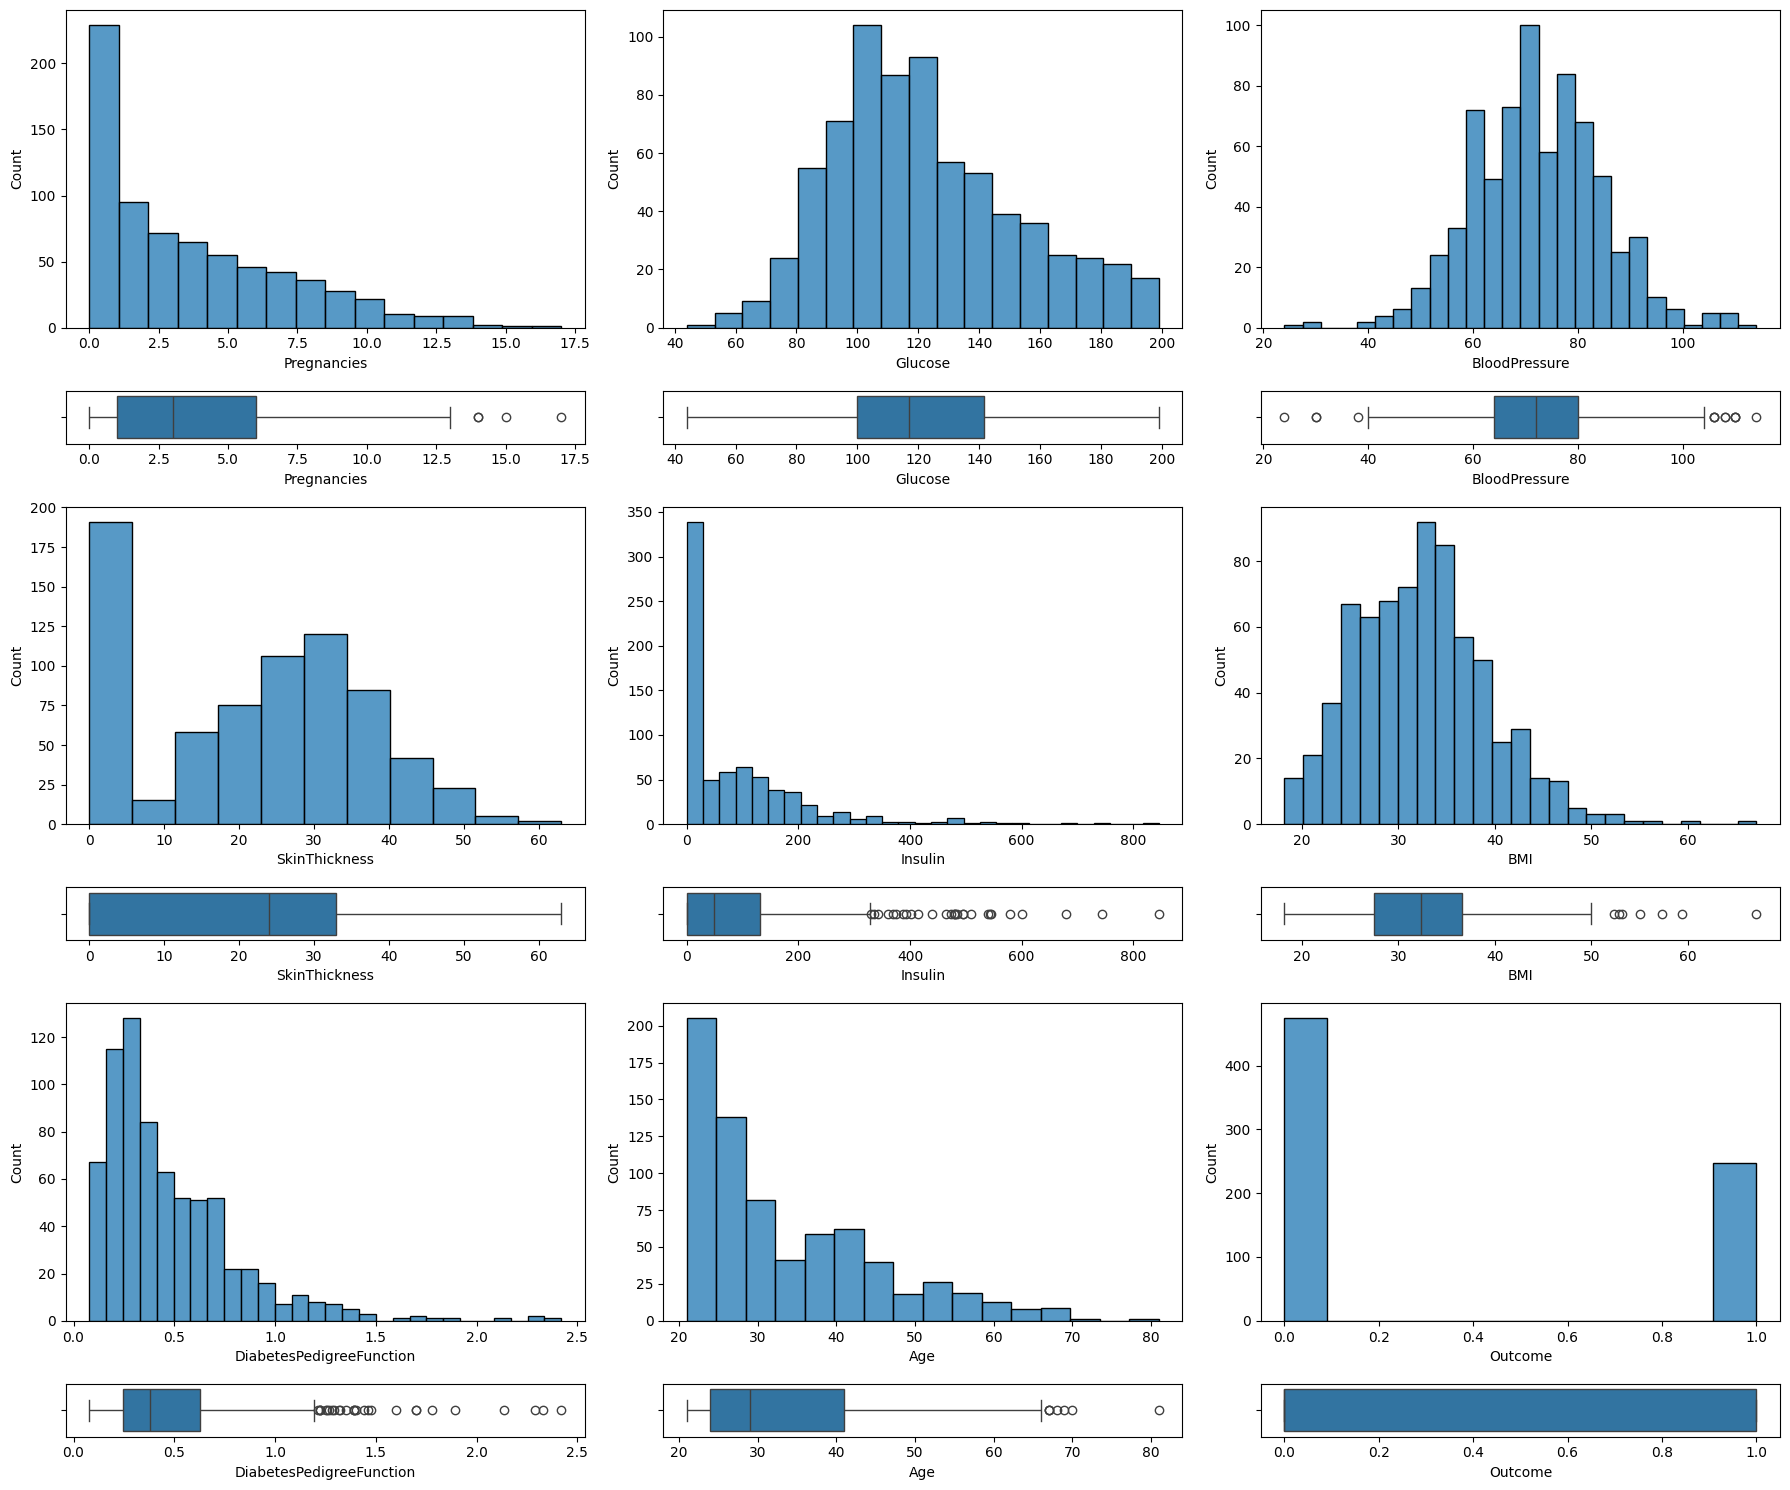

In [10]:
# Variables numéricas
fig, axis = plt.subplots(6, 3, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies") 
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose") 
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure") 
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 0], data = total_data, x = "SkinThickness") 
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = total_data, x = "Insulin") 
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI") 
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")
sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction") 
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 1], data = total_data, x = "Age") 
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")
sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome") 
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")

plt.tight_layout()

plt.show()

<Axes: >

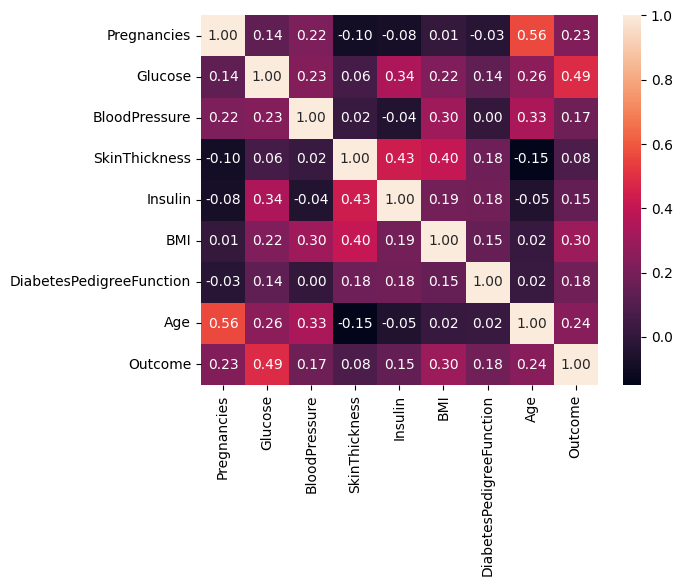

In [11]:
#   Análisis de correlaciones

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

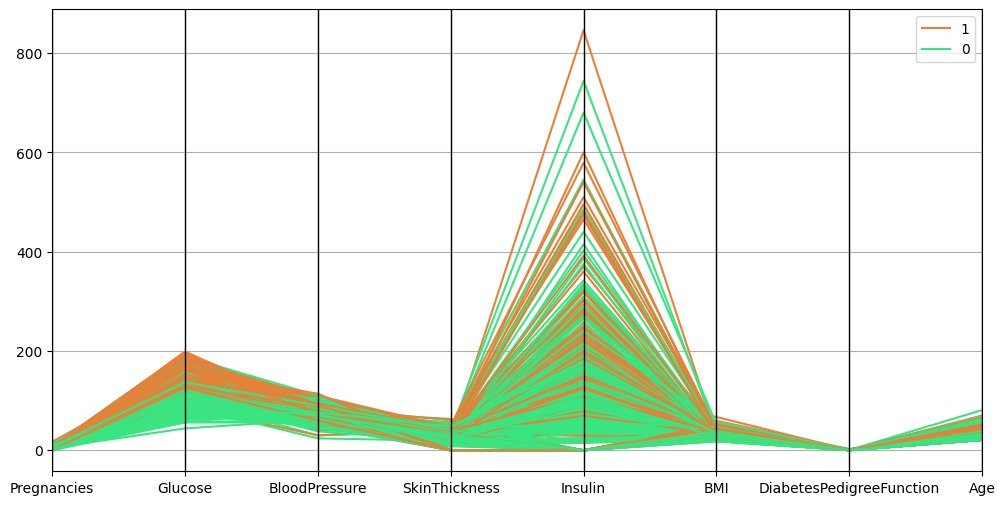

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [13]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,3.872576,121.814404,72.335180,21.365651,84.728532,32.477978,0.474997,33.319945,0.343490
std,3.365048,30.650079,12.258139,15.466732,117.093931,6.887783,0.332605,11.730864,0.475203
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.500000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,141.750000,80.000000,33.000000,131.500000,36.600000,0.628500,41.000000,1.000000
max,17.000000,199.000000,114.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

num_variables = ["Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
487,173,78,265,46.5,1.159,58
6,78,50,88,31.0,0.248,26
387,105,100,0,43.3,0.239,45
635,104,72,0,31.2,0.465,38
469,154,78,140,46.1,0.571,27


In [16]:
y_train.head()

487    0
6      1
387    1
635    1
469    0
Name: Outcome, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

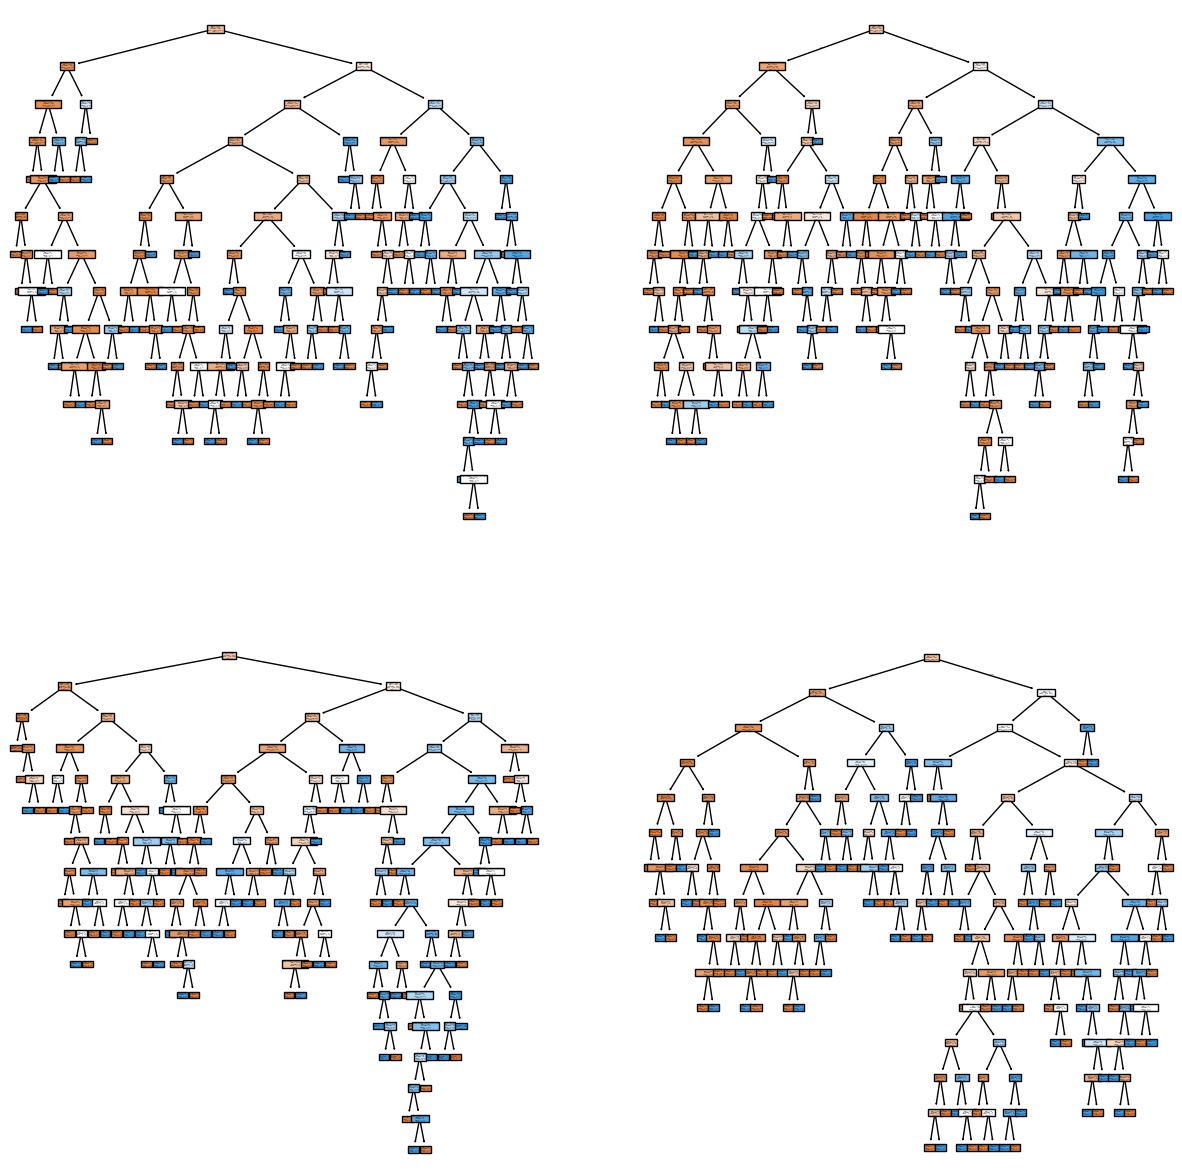

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8413793103448276

In [21]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8

In [22]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.6808510638297872

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.735632183908046

In [28]:
train_csv_path = '../data/train_data.csv'
test_csv_path = '../data/test_data.csv'

X_train.to_csv(train_csv_path, index=False)
y_train.to_csv(test_csv_path, index=False)

In [24]:
# Guardado del modelo
from pickle import dump

dump(model, open("../models/random_forest_regressor_default_42.sav", "wb"))